# DA_Fall21_HW_3 Support Vector Machine and Decision Trees

# Due on 11/22 23:59 pm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## We will use the same affair dataset from HW2, but will skip the EDA phrase we have done enough of it

#### Everything removing outliers, create dummies variabes had been done for you

In [2]:
# Remember the affair data set from HW3, we will use that dataset again
# but we will directly load it from the API
orig_df = pd.read_csv("affairs2.csv")
# Set up our target class label
orig_df['had_affair'] = orig_df['affairs'].apply(lambda x: 1 if x != 0 else 0)
orig_df = orig_df.drop('affairs',axis=1)
# remove NA
orig_df.dropna(inplace=True)
# make sure there is no missing values
orig_df.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
had_affair         0
dtype: int64

In [3]:
# separate the features into categorical vs numerical
numerical_features = ['age', 'yrs_married', 'children']
categorical_features = ['rate_marriage', 'religious', 'educ', 'occupation', 'occupation_husb']
# collect all numerical features with the target variables first
numerical_df = orig_df[numerical_features + ['had_affair']]
numerical_df.head()

,age,yrs_married,children,had_affair
0,32.0,9.0,3.0,1
1,27.0,13.0,3.0,1
2,22.0,2.5,0.0,1
3,37.0,16.5,4.0,1
4,27.0,9.0,1.0,1


In [4]:
# create corresponding dummies variables
rate_marriage = pd.get_dummies(orig_df['rate_marriage'],drop_first=True)
religious = pd.get_dummies(orig_df['religious'],drop_first=True)
edu = pd.get_dummies(orig_df['educ'],drop_first=True)
occ = pd.get_dummies(orig_df['occupation'],drop_first=True)
husb_occ = pd.get_dummies(orig_df['occupation_husb'],drop_first=True)

In [29]:
rate_marriage.head()
orig_df['rate_marriage'].unique()

array([3., 4., 5., 2., 1.])

In [6]:
religious.head()

,2.0,3.0,4.0
0,0,1,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0


In [7]:
# better to create a header to avoid same name
rate_marriage.columns = ['rate1','rate2','rate3','rate4']
rate_marriage

,rate1,rate2,rate3,rate4
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,1,0
4,0,0,0,1
...,...,...,...,...
6466,0,0,0,1
6467,0,0,1,0
6468,0,0,0,1
6469,0,0,0,1


In [8]:
religious.columns = ['re1','rel2','rel3']
religious.head()

,re1,rel2,rel3
0,0,1,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0


***Now we can concatnate the numerical features with rate_marriage and religious variabes***

In [9]:
df = pd.concat([numerical_df, rate_marriage, religious], axis=1)
df.head()

,age,yrs_married,children,had_affair,rate1,rate2,rate3,rate4,re1,rel2,rel3
0,32.0,9.0,3.0,1,0,1,0,0,0,1,0
1,27.0,13.0,3.0,1,0,1,0,0,0,0,0
2,22.0,2.5,0.0,1,0,0,1,0,0,0,0
3,37.0,16.5,4.0,1,0,0,1,0,0,1,0
4,27.0,9.0,1.0,1,0,0,0,1,0,0,0


### The goal of this homework is to practice building Support Vector Machine and Decision Tree Models.

### Part A: Support Vector Machine

***Follow the standard way of building a model and in particular,***
1. Build a classification model using SVC using Linear Kernel without specifying the c-parameter using the above provided data frame
2. Try different values of C-parameters (at least one small and one bigger value)
3. Try using rbf as your kernel and use Gamma of 2**-5, 0.1, 1 and 2 with default value for C-parameter
4. Answer the question out of all the models above, what is the best choice for the kernel, C and gamma parameters
Explain briefly the effect of using different parameter values


***Type your answers and code here***

In [10]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

x_train, x_test, y_train, y_test = train_test_split(df.drop('had_affair',axis=1),
                                                    df['had_affair'], test_size=0.3)
model = svm.SVC(kernel='linear')
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80      1315
           1       0.55      0.41      0.47       595

    accuracy                           0.71      1910
   macro avg       0.66      0.63      0.64      1910
weighted avg       0.70      0.71      0.70      1910

0.712565445026178


In [11]:
# Try different values of C-parameters (at least one small and one bigger value)

model_2 = svm.SVC(kernel='linear', C=2**-5)
model_2.fit(x_train, y_train)
predictions = model_2.predict(x_test)
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))


              precision    recall  f1-score   support

           0       0.76      0.85      0.80      1315
           1       0.55      0.41      0.47       595

    accuracy                           0.71      1910
   macro avg       0.66      0.63      0.64      1910
weighted avg       0.70      0.71      0.70      1910

0.712565445026178


In [12]:
model_3 = svm.SVC(kernel='linear', C=2**5)
model_3.fit(x_train, y_train)
predictions = model_3.predict(x_test)
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80      1315
           1       0.55      0.41      0.47       595

    accuracy                           0.71      1910
   macro avg       0.66      0.63      0.64      1910
weighted avg       0.70      0.71      0.70      1910

0.712565445026178


In [13]:
# Try using rbf as your kernel and use Gamma of 2**-5, 0.1, 1 and 2 with default value for C-parameter
model_4 = svm.SVC(kernel='rbf', C=1, gamma=2**-5)
model_4.fit(x_train, y_train)
predictions = model_4.predict(x_test)
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82      1315
           1       0.61      0.37      0.46       595

    accuracy                           0.73      1910
   macro avg       0.69      0.63      0.64      1910
weighted avg       0.71      0.73      0.71      1910

0.7308900523560209


In [14]:
model_5 = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model_5.fit(x_train, y_train)
predictions = model_5.predict(x_test)
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.89      0.82      1315
           1       0.60      0.35      0.44       595

    accuracy                           0.73      1910
   macro avg       0.68      0.62      0.63      1910
weighted avg       0.71      0.73      0.70      1910

0.725130890052356


In [15]:
model_6 = svm.SVC(kernel='rbf', C=1, gamma=1)
model_6.fit(x_train, y_train)
predictions = model_6.predict(x_test)
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.86      0.80      1315
           1       0.55      0.39      0.46       595

    accuracy                           0.71      1910
   macro avg       0.65      0.62      0.63      1910
weighted avg       0.69      0.71      0.70      1910

0.7115183246073299


In [16]:
model_7 = svm.SVC(kernel='rbf', C=1, gamma=2)
model_7.fit(x_train, y_train)
predictions = model_7.predict(x_test)
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80      1315
           1       0.53      0.33      0.41       595

    accuracy                           0.70      1910
   macro avg       0.64      0.60      0.61      1910
weighted avg       0.68      0.70      0.68      1910

0.7015706806282722


# the best choice for the kernel, C and gamma parameters Explain briefly the effect of using different parameter values
the best choice for the kernel is rbf ，c parameter is 1，gamma paramter = 2**-5，using different parameters will affect the accuracy slightly.

### Part B: Now we will try to fit the same dataset with Decision Trees

***Follow the standard way of building a model and in particular,***
1. Build a Decision Tree Classifier
2. Try using different max_depth = 2, 3, 4 and crierion = 'gini' and 'entropy' to build 6 different models
3. Answer the question of what is your observation from step 2. Does the choice of the criterion important or not. What about max_depth? and What is the best choice of max_depth and criterion
4. Pick 3 models with max_depth = 2, 3, 4 and. You can pick which ever criterions you want and visualize the 3 trees.
5. Build a Random Forest Classifier with, say 100 trees. Comment on its model performance when compared with the individual trees models above


***Type your code and answers here***

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

x_train, x_test, y_train, y_test = train_test_split(df.drop('had_affair',axis=1),
                                                    df['had_affair'], test_size=0.30
                                                    )
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80      1317
           1       0.54      0.37      0.44       593

    accuracy                           0.71      1910
   macro avg       0.65      0.61      0.62      1910
weighted avg       0.69      0.71      0.69      1910

0.7078534031413612


In [18]:
# Try using different max_depth = 2, 3, 4 and crierion = 'gini' and 'entropy' to build 6 different models
model2_1 = DecisionTreeClassifier(max_depth=2, criterion='gini')
model2_1.fit(x_train, y_train)
predictions = model2_1.predict(x_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81      1317
           1       0.57      0.40      0.47       593

    accuracy                           0.72      1910
   macro avg       0.66      0.63      0.64      1910
weighted avg       0.70      0.72      0.70      1910

0.7193717277486911


In [19]:
model2_2 = DecisionTreeClassifier(max_depth=3, criterion='gini')
model2_2.fit(x_train, y_train)
predictions = model2_2.predict(x_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81      1317
           1       0.57      0.40      0.47       593

    accuracy                           0.72      1910
   macro avg       0.66      0.63      0.64      1910
weighted avg       0.70      0.72      0.70      1910

0.7193717277486911


In [20]:
model2_3 = DecisionTreeClassifier(max_depth=4, criterion='gini')
model2_3.fit(x_train, y_train)
predictions = model2_3.predict(x_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81      1317
           1       0.59      0.38      0.46       593

    accuracy                           0.72      1910
   macro avg       0.67      0.63      0.64      1910
weighted avg       0.71      0.72      0.70      1910

0.7240837696335078


In [21]:
model2_4 = DecisionTreeClassifier(max_depth=2, criterion='entropy')
model2_4.fit(x_train, y_train)
predictions = model2_4.predict(x_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81      1317
           1       0.57      0.40      0.47       593

    accuracy                           0.72      1910
   macro avg       0.66      0.63      0.64      1910
weighted avg       0.70      0.72      0.70      1910

0.7193717277486911


In [22]:
model2_5 = DecisionTreeClassifier(max_depth=3, criterion='entropy')
model2_5.fit(x_train, y_train)
predictions = model2_5.predict(x_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81      1317
           1       0.57      0.40      0.47       593

    accuracy                           0.72      1910
   macro avg       0.66      0.63      0.64      1910
weighted avg       0.70      0.72      0.70      1910

0.7193717277486911


In [23]:
model2_6 = DecisionTreeClassifier(max_depth=4, criterion='entropy')
model2_6.fit(x_train, y_train)
predictions = model2_6.predict(x_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81      1317
           1       0.59      0.38      0.46       593

    accuracy                           0.72      1910
   macro avg       0.67      0.63      0.64      1910
weighted avg       0.71      0.72      0.70      1910

0.7240837696335078


<!--  Does the choice of the criterion important or not. 
What about max_depth? and What is the best choice of max_depth and criterion -->
**The choice of the criterion is not that important in our case**. 
Choosing either entropy or gini gives the similar accuracy score.

**the different between the max_depth is not important in this case**.
Choosing the three different max_depth,gives the similar accuracy score. 

The best choice of max_depth and criterion is max_depth=3 and criterion='entropy' or 'gini' 

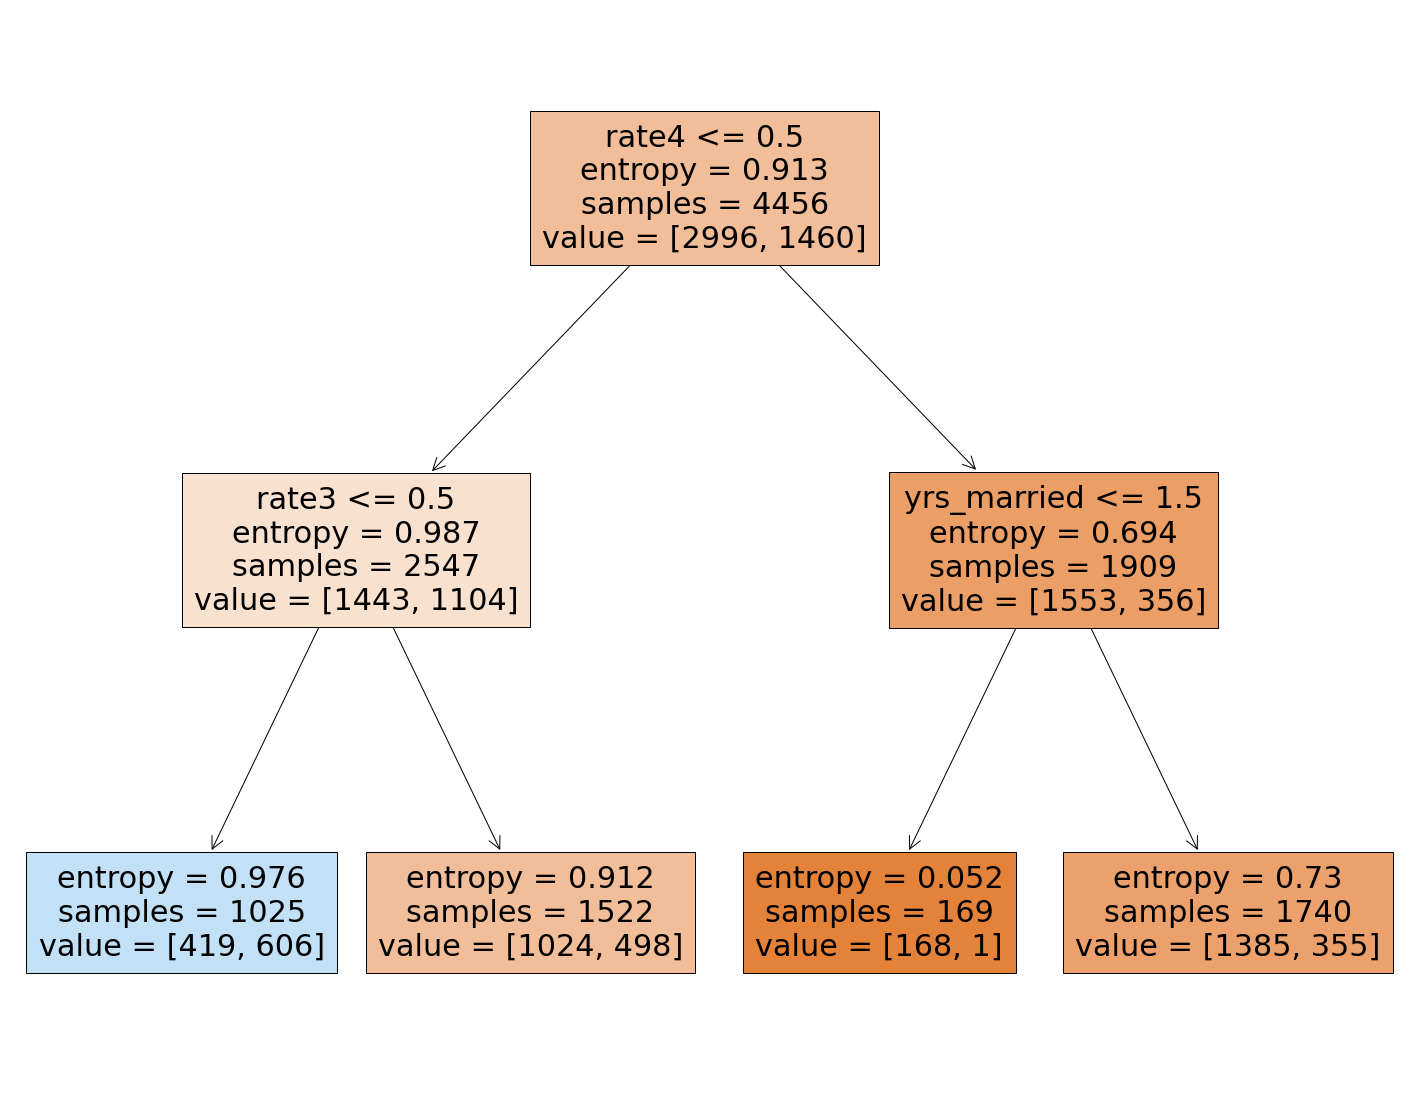

In [24]:
# Pick 3 models with max_depth = 2, 3, 4 and. You can pick which ever criterions you want and visualize the 3 trees.
from sklearn import tree
from matplotlib.pyplot import figure
feature_names = df.drop('had_affair', axis=1).columns
model1 = DecisionTreeClassifier(max_depth=2, criterion='entropy')
model1.fit(x_train, y_train)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model1,feature_names=feature_names, filled=True)




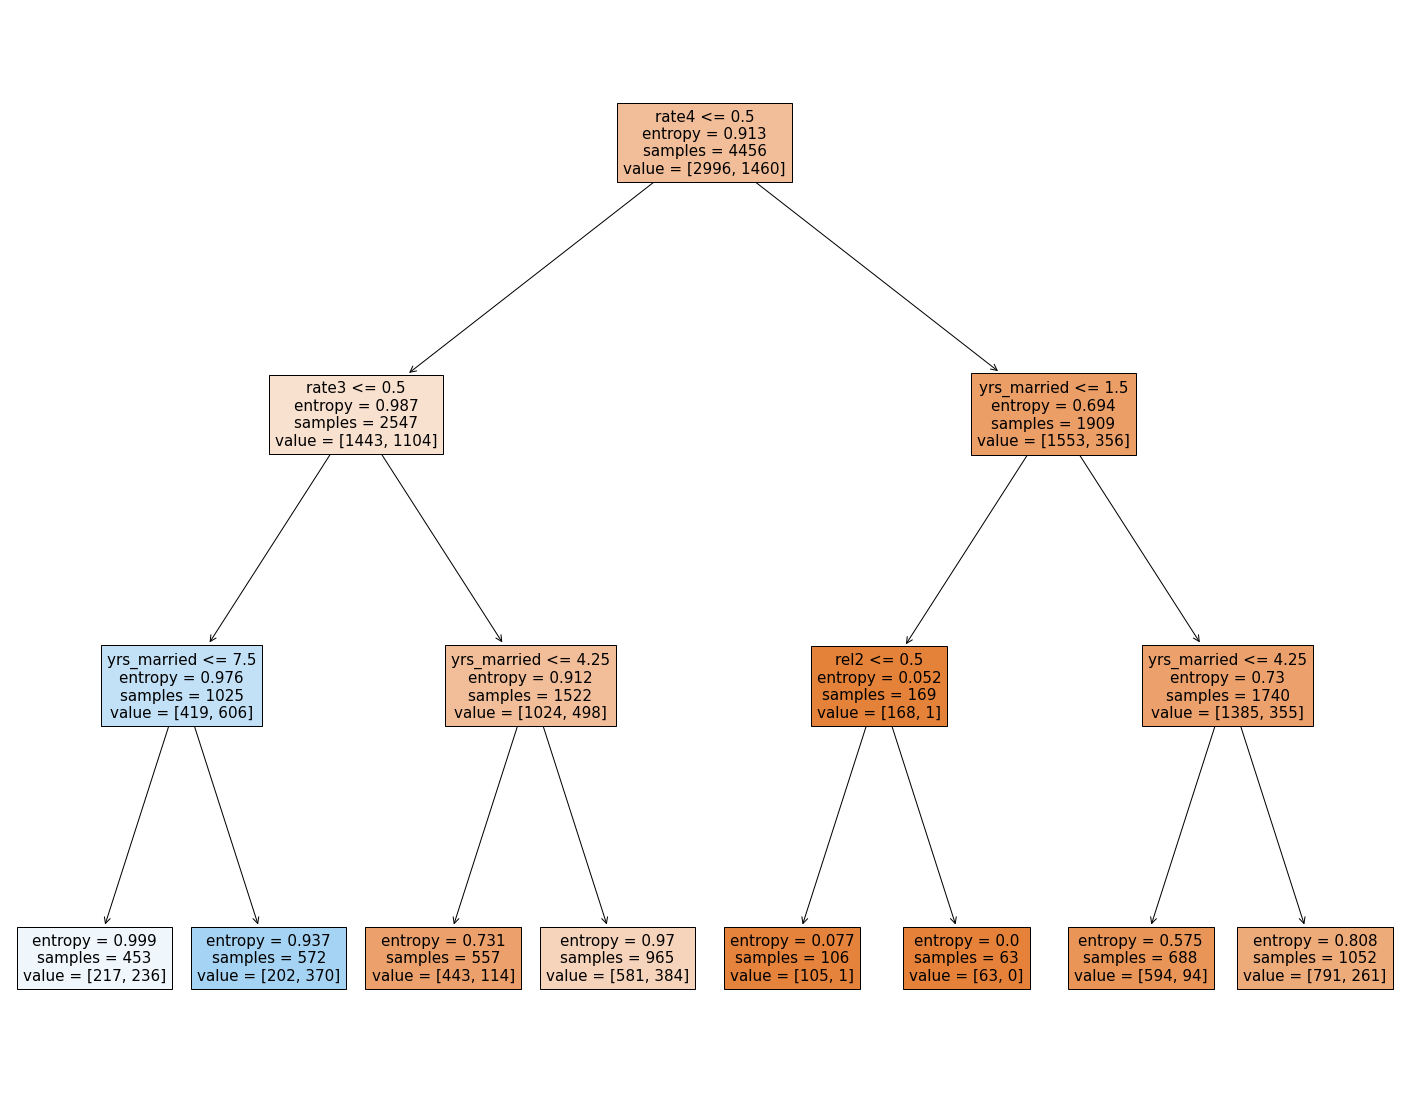

In [25]:
model2 = DecisionTreeClassifier(max_depth=3, criterion='entropy')
model2.fit(x_train, y_train)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model2, feature_names=feature_names,filled=True)


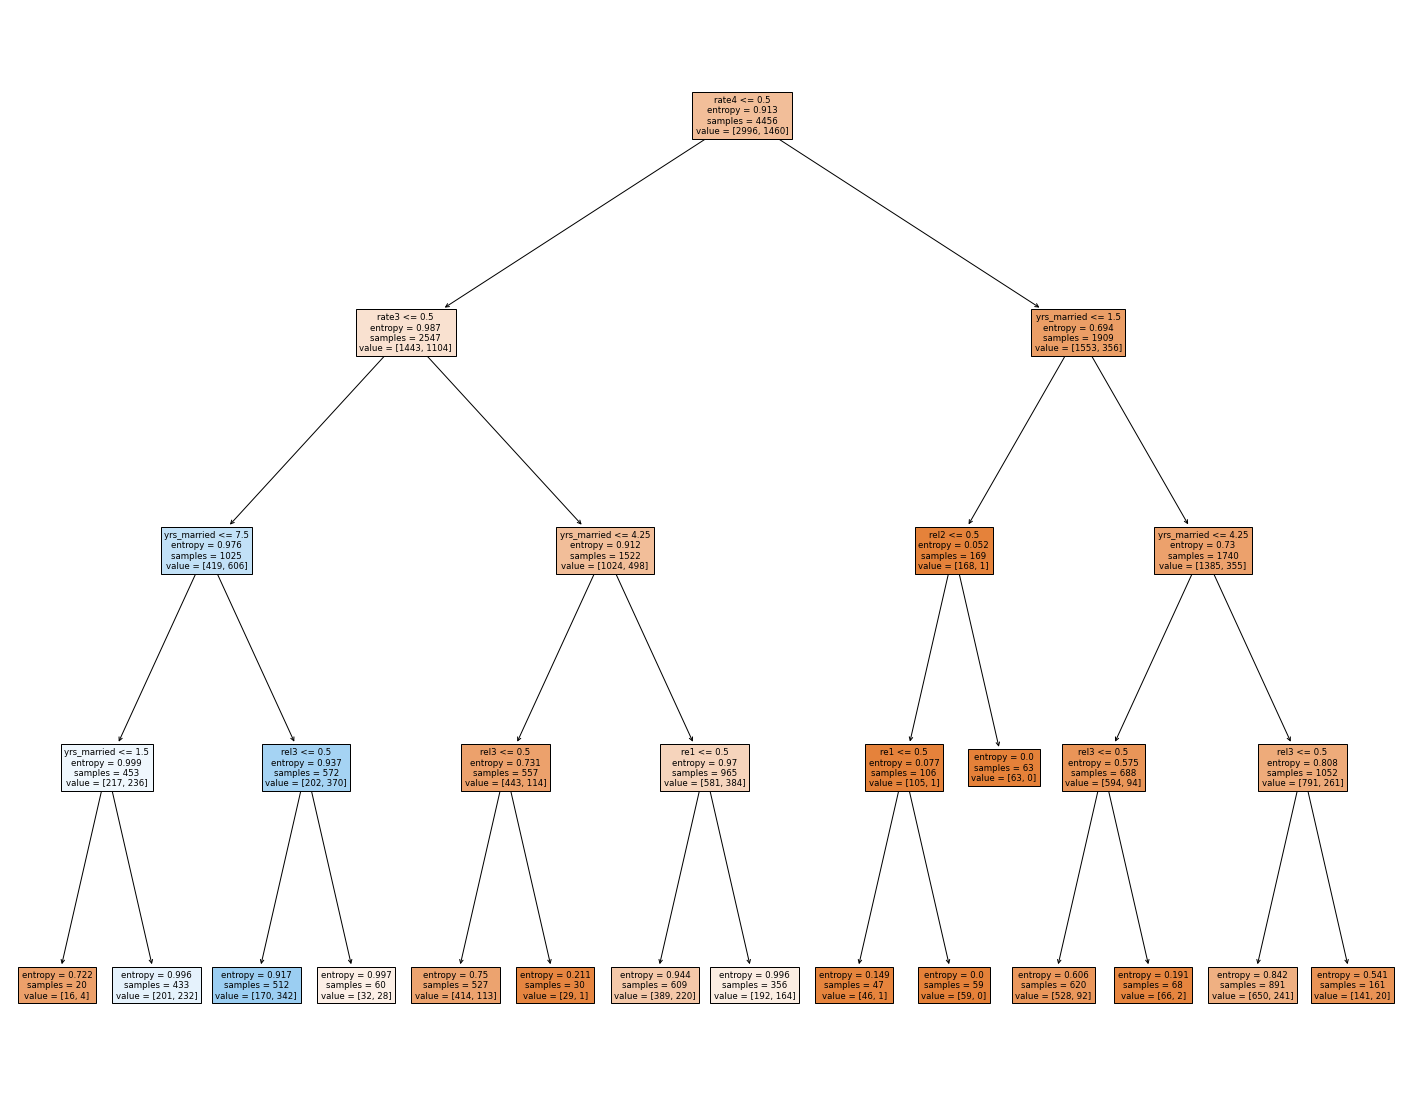

In [26]:
model3 = DecisionTreeClassifier(max_depth=4, criterion='entropy')
model3.fit(x_train, y_train)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model3, feature_names=feature_names,filled=True)

In [27]:
# Build a Random Forest Classifier with, say 100 trees. 
# Comment on its model performance when compared with the individual trees models above
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)
predictions = rfc.predict(x_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))
print("there is no big different performance between them,Compared to the individual trees models above,the accuracy scores are similar")

              precision    recall  f1-score   support

           0       0.77      0.84      0.80      1317
           1       0.55      0.43      0.48       593

    accuracy                           0.71      1910
   macro avg       0.66      0.63      0.64      1910
weighted avg       0.70      0.71      0.70      1910

0.712565445026178
there is no big different performance between them,Compared to the individual trees models above,the accuracy scores are similar


### Part C: Now finally create a dataframe including all other categorical variable and build decision tree model

In [28]:
# Type your code here, fill in the missing code here
# 'rate_marriage', 'religious', 'educ', 'occupation', 'occupation_husb'
edu.columns = ['edu1','edu2','edu3','edu4','edu5' ]
occ.columns = ['occ1','occ2','occ3','occ4','occ5' ]
husb_occ.columns= ['husb_occ1','husb_occ2','husb_occ3','husb_occ4','husb_occ5' ]
df1 = pd.concat([numerical_df, rate_marriage, religious,edu,occ,husb_occ], axis=1)
df1.head()
print(df1.columns)

x_train, x_test, y_train, y_test = train_test_split(df1.drop('had_affair',axis=1),
                                                    df1['had_affair'], test_size=0.3
                                                    )
model_c = DecisionTreeClassifier()
model_c.fit(x_train,y_train)
predictions = model_c.predict(x_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

Index(['age', 'yrs_married', 'children', 'had_affair', 'rate1', 'rate2',
       'rate3', 'rate4', 're1', 'rel2', 'rel3', 'edu1', 'edu2', 'edu3', 'edu4',
       'edu5', 'occ1', 'occ2', 'occ3', 'occ4', 'occ5', 'husb_occ1',
       'husb_occ2', 'husb_occ3', 'husb_occ4', 'husb_occ5'],
      dtype='object')
              precision    recall  f1-score   support

           0       0.72      0.77      0.74      1271
           1       0.46      0.40      0.43       639

    accuracy                           0.64      1910
   macro avg       0.59      0.58      0.59      1910
weighted avg       0.63      0.64      0.64      1910

0.643979057591623


***Use the same model as in Part B step 1 with this new dataframe. Comment on whether the additional variables help the model performance or not***

***Type your code and answers here***

Additional variables do not help improve model perform, 
originally accuracy score is 0.69
whereas now accuracy score is 0.66